<a href="https://colab.research.google.com/github/TimeKP/ds_project/blob/main/AI_13_%EA%B0%95%EB%8B%A4%EC%9D%B8_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 1**

**AI 13기 강다인**


---



# **다음 분기에 어떤 게임을 설계해야 할까?**

## **0. Given information**

Name : 게임의 이름

Platform : 게임 지원 플랫폼 이름

Year : 게임이 출시된 연도

Genre : 게임의 장르

Publisher : 게임을 제작한 회사

NA_Sales : 북미지역에서의 출고량

EU_Sales : 유럽지역에서의 출고량

JP_Sales : 일본지역에서의 출고량

Other_Sales : 기타지역에서의 출고량

## **0-1. Import Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
fig_path = '/content/drive/MyDrive/AI_bootcamp/Section1-Introduction to Data Science/Project1'
df_raw = pd.read_csv('/content/drive/MyDrive/AI_bootcamp/Section1-Introduction to Data Science/Project1/vgames2.csv')

#df_raw = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')

df_raw = df_raw.drop(['Unnamed: 0'], axis = 1)

print('Data:')
df_raw.head()

Data:


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
print('Data\'s shape:', df_raw.shape, '\n')
print('Data types:', df_raw.info())

Data's shape: (16598, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB
Data types: None


## **0-2. EDA**

In [5]:
df = df_raw.copy()

In [6]:
#Change to numeric
def toNumeric(string):
  if 'K' in string :
    string = string.replace('K','x1000')
  if 'M' in string :
    string = string.replace('M','x1000000')
  if 'x' in string :
    a,b = string.split("x")
    string = float(a) * float(b)
  else :
    string = float(string)
  return string

column_names = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for column in column_names :
  df[column] = df[column].apply(toNumeric)

In [7]:
#Ford Racing
condition = df['Name'].isin(['Ford Racing'])
print('Test function \'toNumeric\':')
print('-------------------------------------------------------------------------------')
print('Before:', df_raw[condition])
print('-------------------------------------------------------------------------------')
print('After:', df[condition])

Test function 'toNumeric':
-------------------------------------------------------------------------------
Before:            Name Platform    Year   Genre           Publisher NA_Sales  \
10  Ford Racing       PS  2001.0  Racing  Empire Interactive     480K   

   EU_Sales JP_Sales Other_Sales  
10    0.33M       0K        0.06  
-------------------------------------------------------------------------------
After:            Name Platform    Year   Genre           Publisher  NA_Sales  \
10  Ford Racing       PS  2001.0  Racing  Empire Interactive  480000.0   

    EU_Sales  JP_Sales  Other_Sales  
10  330000.0       0.0         0.06  


## **1. 지역에 따라서 선호하는 게임 장르**

In [8]:
df_region = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].copy()

In [9]:
#df_region.info()
df_region = df_region.dropna()
df_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16548 entries, 0 to 16597
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genre        16548 non-null  object 
 1   NA_Sales     16548 non-null  float64
 2   EU_Sales     16548 non-null  float64
 3   JP_Sales     16548 non-null  float64
 4   Other_Sales  16548 non-null  float64
dtypes: float64(4), object(1)
memory usage: 775.7+ KB


In [10]:
df_region_grp = df_region.groupby('Genre').sum().copy()
df_region_grp.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,21650853.16,7210514.95,1440156.46,1340185.11
Adventure,760104.90,190063.86,80051.87,280016.53
Fighting,1360221.84,1420099.80,1340086.00,500036.14
Misc,4300403.75,2820209.54,420104.85,460073.58
Platform,5220441.22,7620193.99,790129.86,520051.01


In [11]:
df_region_per = df_region_grp.div(df_region_grp.sum(axis = 0), axis = 1).copy()
df_region_per = df_region_per.mul(100)
df_region_per.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,28.426512,20.826164,7.214758,17.819751
Adventure,0.997981,0.548962,0.401036,3.723236
Fighting,1.785905,4.101681,6.713435,6.648723
Misc,5.646220,8.145624,2.104601,6.117361
Platform,6.854184,22.009442,3.958317,6.914850


In [12]:
print('Total percent confirm:')
print(df_region_per.sum(axis = 0))

Total percent confirm:
NA_Sales       100.0
EU_Sales       100.0
JP_Sales       100.0
Other_Sales    100.0
dtype: float64


In [13]:
df_region_graph = df_region_per.transpose().copy()
df_region_graph

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,28.426512,0.997981,1.785905,5.646220,6.854184,0.564730,15.690219,2.101139,16.399507,4.254198,15.900716,1.378688
EU_Sales,20.826164,0.548962,4.101681,8.145624,22.009442,1.184350,5.892820,4.650696,17.995024,3.206342,11.092166,0.346727
JP_Sales,7.214758,0.401036,6.713435,2.104601,3.958317,0.000285,1.402998,59.015985,0.300774,6.412734,7.264742,5.210335
Other_Sales,17.819751,3.723236,6.648723,6.117361,6.914850,0.664990,5.585543,21.541041,9.840754,0.931172,16.090521,4.122057


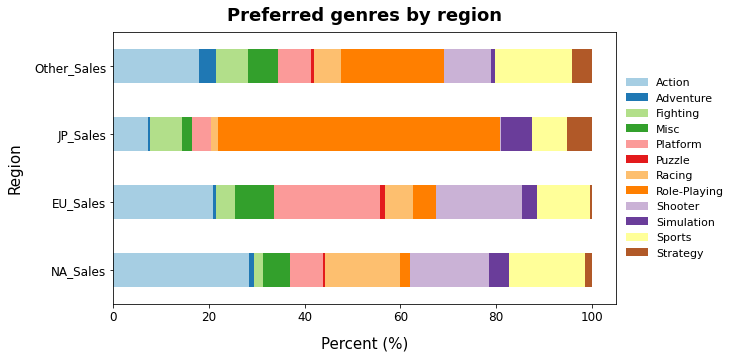

In [14]:
plt.rcParams['figure.figsize'] = (9, 5)
df_region_graph.plot(kind = 'barh', stacked = True, colormap = 'Paired');

plt.title('Preferred genres by region', fontsize = 18, fontweight = 'heavy', position=(0.5, 1.0+0.02))
plt.ylabel('Region', fontsize = 15, labelpad = 12)
plt.xlabel('Percent (%)', fontsize = 15, labelpad = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 11, frameon = False)

plt.savefig(fig_path + '/1_Preferred genres by region_bar.png', bbox_inches='tight')
plt.show();

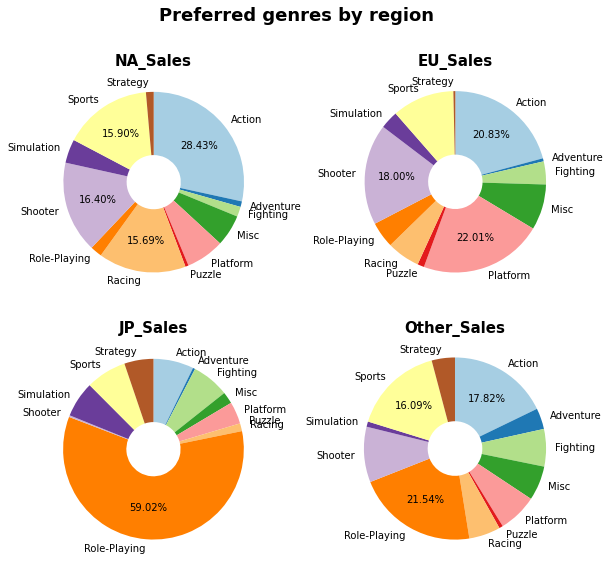

In [15]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(2, 2, figsize = (9, 9))
plt.subplots_adjust(wspace = 0.5, hspace = 0.2) # interval between subplots
fig.suptitle('Preferred genres by region', fontsize = 18, fontweight = 'heavy')
	
colors = sns.color_palette('Paired',len(df_region_graph.columns)) # bring seaborn palette
position = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i in range (4) :
  ax = axes[position[i]] # positon of subplot
  ax.pie(df_region_graph.iloc[i], # Region 별로 sales plot
         labels = df_region_graph.columns,
         counterclock = False, # clockwise
         autopct = lambda p : '{:.2f}%'.format(p) if p > 15 else " ", # marking % (only for less than 15)
         pctdistance = 0.65, # position of % mark
         shadow = False, startangle = 90, # Start from 90 degree
         wedgeprops = {'width' : 0.7}, # donut shape; diameter differences (large - small)
         colors = colors)
  ax.axis('equal')
  ax.set_title(df_region_graph.index[i], fontsize = 15, fontweight = 'heavy')

plt.savefig(fig_path + '/1-1_Preferred genres by region_pie.png', bbox_inches='tight')
plt.show();

## **2. 연도별 선호되는 게임 장르의 트렌드**

In [16]:
df_years = df[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].copy()

In [17]:
df_years = df_years.dropna()
df_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16597
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         16277 non-null  float64
 1   Genre        16277 non-null  object 
 2   NA_Sales     16277 non-null  float64
 3   EU_Sales     16277 non-null  float64
 4   JP_Sales     16277 non-null  float64
 5   Other_Sales  16277 non-null  float64
dtypes: float64(5), object(1)
memory usage: 890.1+ KB


In [18]:
condition = (df_years['Year'] > 1000)
df_years = df_years[condition]
df_years = df_years.sort_values('Year', ascending = False)
df_years.reset_index(drop = True, inplace = True)

df_years['Total'] = df_years[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum(axis = 1)
df_years['Year'] = df_years['Year'].astype(int)
df_years.head()

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,2020,Simulation,0.27,0.0,0.00,0.02,0.29
1,2017,Role-Playing,0.00,0.0,0.01,0.00,0.01
2,2017,Role-Playing,0.00,0.0,0.03,0.00,0.03
3,2017,Action,0.00,0.0,0.01,0.00,0.01
4,2016,Sports,0.00,0.0,0.11,0.00,0.11


In [19]:
df_tidy = df_years[['Year', 'Genre', 'Total']].copy()
df_tidy = df_tidy.groupby(['Year', 'Genre']).sum()
#df_wide = df_tidy.pivot_table(index = 'Year', columns = 'Genre', values = 'Total')
df_tidy.head()

Total
Year Genre              
1980 Action         0.34
     Fighting       0.77
     Misc           2.70
     Shooter        7.07
1981 Action    110014.68

In [20]:
df_heat = df_tidy.pivot_table(index = 'Genre', columns = 'Year', values = 'Total')

df_cumsum = df_heat.transpose().copy()
df_cumsum = df_cumsum.cumsum()

df_cumsum.iloc[0].fillna(value = 0, inplace = True)
df_cumsum.fillna(method = 'ffill', inplace = True)
df_cumsum.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,0.0,0.77,2.70,0.00,0.00,0.00,0.0,7.07,0.00,0.00,0.0
1981,110015.02,0.0,0.77,2.70,6.92,2.25,0.48,0.0,17.09,0.44,0.78,0.0
1982,110021.52,0.0,0.77,3.57,11.95,12.29,2.05,0.0,20.90,0.44,1.84,0.0
1983,110024.38,0.4,0.77,5.71,18.88,13.07,2.05,0.0,21.39,0.44,5.04,0.0
1984,110026.23,0.4,0.77,7.16,19.57,16.21,8.00,0.0,52.49,0.44,11.21,0.0


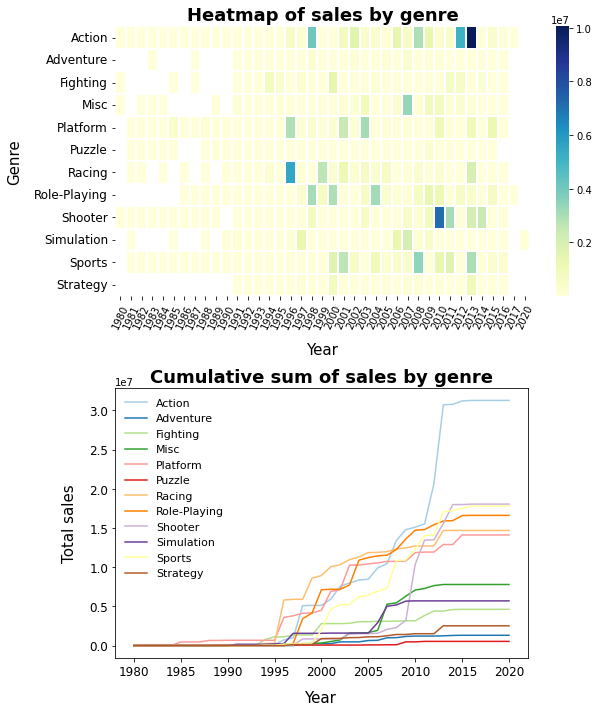

In [21]:
def plot_year(df1, df2):

  fig = plt.figure(figsize=(9, 10))

  plot1 = plt.subplot2grid((2, 5), (0, 0), colspan = 5)
  plot2 = plt.subplot2grid((2, 5), (1, 0), colspan = 4)
  
#  f, ax = plt.subplots(2, 1)#, gridspec_kw={'width_ratios': [1, 1]})
#  f.set_size_inches((8, 12))
#  plt.subplots_adjust(wspace = 0.15, hspace = 0.35)

  sns.heatmap(data = df1, linewidths=1, cmap='YlGnBu', ax = plot1);

  plot1.set_title('Heatmap of sales by genre', fontsize = 18, fontweight = 'heavy')
  plot1.set_ylabel('Genre', labelpad = 12, fontsize = 15)
  plot1.set_xlabel('Year', labelpad = 12, fontsize = 15)
  plot1.tick_params(axis='y', labelsize = 12)
  plot1.tick_params(axis='x', rotation = 65, labelsize = 10)

  sns.lineplot(data = df2, dashes = False, palette = 'Paired', ax = plot2)

  plot2.set_title('Cumulative sum of sales by genre', fontsize = 18, fontweight = 'heavy')
  plot2.set_ylabel('Total sales', labelpad = 12, fontsize = 15)
  plot2.set_xlabel('Year', labelpad = 12, fontsize = 15)
  plot2.tick_params(axis='both', labelsize = 12)
  plot2.legend(fontsize = 11, frameon = False)

  plt.tight_layout()

  plt.savefig(fig_path + '/2_Sales characteristics by genre.png', bbox_inches='tight')
  plt.show();

plot_year(df_heat, df_cumsum)

## **3. 연도별 출시되는 게임의 트렌드**

In [22]:
df_years2 = df_years[['Year', 'Genre']].copy()
#Genre = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing','Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

df_years2_count = pd.DataFrame(df_years2.groupby(['Year', 'Genre']).size().copy())

df_years2_count.reset_index(inplace = True)
df_years2_count.columns = ['Year', 'Genre', 'Count']

df_years2_count = df_years2_count.sort_values(by = 'Genre', ascending = True)

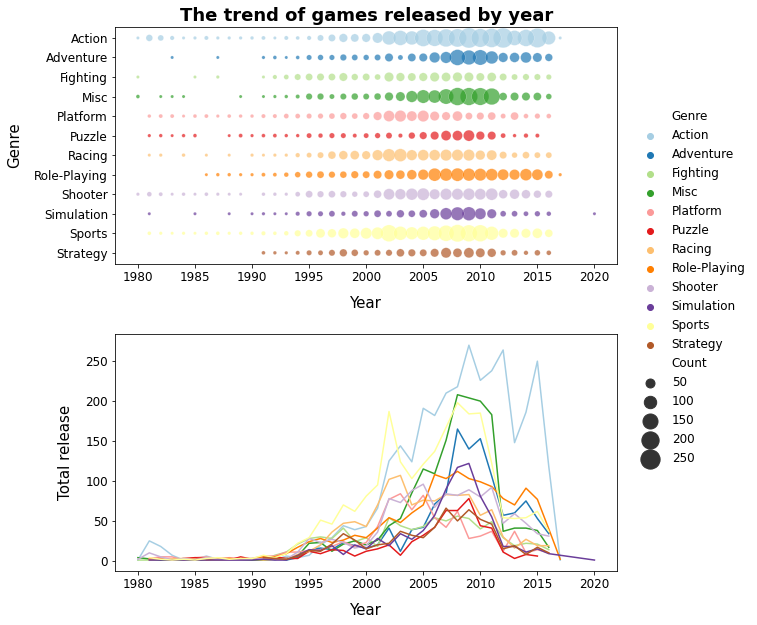

In [23]:
def plot_year2(df):

  fig, ax = plt.subplots(2, 1, figsize = (9, 10))
  plt.subplots_adjust(hspace = 0.3)

  sns.scatterplot(data = df, x='Year', y='Genre',
                size = 'Count', sizes = (10, 400),
                hue = 'Genre', palette = 'Paired', alpha = 0.7, ax = ax[0])

  ax[0].set_title('The trend of games released by year', fontsize = 18, fontweight = 'heavy')
  ax[0].set_ylabel('Genre', labelpad = 12, fontsize = 15)
  ax[0].set_xlabel('Year', labelpad = 12, fontsize = 15)
  ax[0].tick_params(axis='y', labelsize = 12)
  ax[0].tick_params(axis='x', labelsize = 12)

  sns.lineplot(data = df, x = 'Year', y = 'Count', hue = 'Genre', palette = 'Paired', ax = ax[1], legend = None)

  ax[1].set_ylabel('Total release', labelpad = 12, fontsize = 15)
  ax[1].set_xlabel('Year', labelpad = 12, fontsize = 15)
  ax[1].tick_params(axis='both', labelsize = 12)

  ax[0].legend(loc='center left', bbox_to_anchor=(1.02, -0.1),
           fontsize = 12,
           frameon = False)

  plt.savefig(fig_path + '/3_The trend of games released by year.png', bbox_inches='tight')
  plt.show();

plot_year2(df_years2_count)

## **4. 연도별 게임 장르의 Sales / Release**

In [24]:
df_years2_count.head()
df_year_sales = df_heat.copy()
df_year_release = df_years2_count.pivot_table(index = 'Genre', columns = 'Year', values = 'Count').copy()
df_year_div = df_year_sales.div(df_year_release)

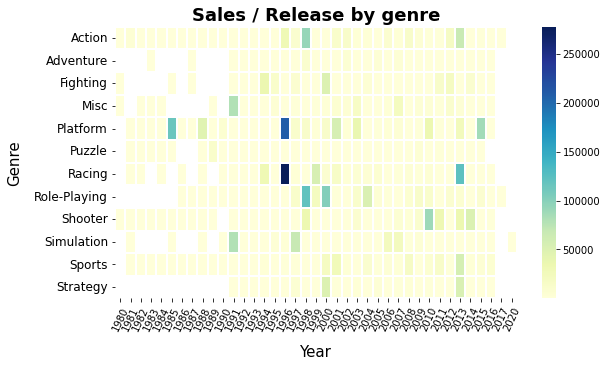

In [25]:
fig = plt.figure(figsize=(9, 5))

sns.heatmap(data = df_year_div, linewidths=1, cmap='YlGnBu')#, ax = plot1);
plt.title('Sales / Release by genre', fontsize = 18, fontweight = 'heavy')
plt.ylabel('Genre', labelpad = 12, fontsize = 15)
plt.xlabel('Year', labelpad = 12, fontsize = 15)
plt.tick_params(axis='y', labelsize = 12)
plt.tick_params(axis='x', rotation = 65, labelsize = 10)

plt.savefig(fig_path + '/4_Sales div Release by genre.png', bbox_inches='tight')
plt.show();

## **5. 연도별 선호 플랫폼 트렌드**

In [26]:
df_plat_raw = df.copy()
df_plat_raw.drop(['Name', 'Publisher'], axis = 1, inplace = True)

df_plat_raw = df_plat_raw.dropna()

In [27]:
condition = (df_plat_raw['Year'] > 1000)
df_plat = df_plat_raw[condition].copy()
df_plat = df_plat.sort_values('Year', ascending = False)
df_plat.reset_index(drop = True, inplace = True)

df_plat['Total_Sales'] = df_plat[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum(axis = 1)
df_plat.drop(['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], axis = 1, inplace = True)

df_plat['Year'] = df_plat['Year'].astype(int)
df_plat.head()

,Platform,Year,Genre,Total_Sales
0,DS,2020,Simulation,0.29
1,PSV,2017,Role-Playing,0.01
2,PS4,2017,Role-Playing,0.03
3,PSV,2017,Action,0.01
4,PS3,2016,Sports,0.11


In [28]:
df_plat_year = df_plat[['Platform', 'Year']].copy()
df_plat_year = pd.DataFrame(df_plat_year.groupby(['Year', 'Platform']).size())

df_plat_year.reset_index(inplace = True)
df_plat_year.columns = ['Year', 'Platform', 'Count']

#df_plat_year = df_plat_year.sort_values(by = 'Genre', ascending = True)
df_plat_year.head()

,Year,Platform,Count
0,1980,2600,8
1,1981,2600,46
2,1982,2600,36
3,1983,2600,11
4,1983,NES,6


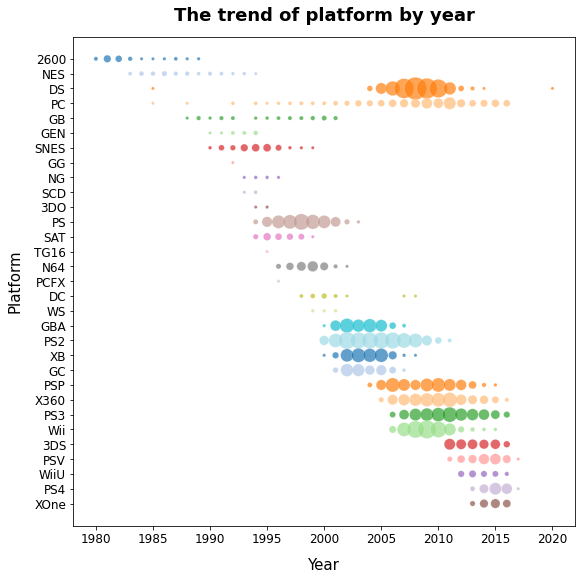

In [29]:
plt.rcParams['figure.figsize'] = (9, 9)

sns.scatterplot(data = df_plat_year, x='Year', y='Platform',
                size = 'Count', sizes = (10, 500),
                hue = 'Platform', palette = 'tab20', alpha = 0.7, legend = None)

plt.title('The trend of platform by year', fontsize = 18, fontweight = 'heavy', position=(0.5, 1.0+0.02))
plt.ylabel('Platform', fontsize = 15, labelpad = 12)
plt.xlabel('Year', fontsize = 15, labelpad = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.savefig(fig_path + '/5_The trend of platform by year.png', bbox_inches='tight')
plt.show();

## **6. (Year > 2000) 에서 선호되는 장르, 플랫폼**

In [30]:
condition = (df_plat_raw['Year'] >= 2000)
df_tot_region = df_plat_raw[condition].copy()
df_tot_region.reset_index(drop = True, inplace = True)

df_tot_region['Total_Sales'] = df_tot_region[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum(axis = 1)
df_tot_region.drop(['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], axis = 1, inplace = True)

df_tot_region = df_tot_region.drop(['Year'], axis = 1)
df_tot_region.head()

,Platform,Genre,Total_Sales
0,DS,Action,0.04
1,Wii,Action,0.18
2,PSP,Adventure,0.02
3,DS,Misc,0.04
4,PS3,Platform,0.25


In [31]:
df_tot_gen = df_tot_region.drop(['Platform'], axis = 1).copy()
df_tot_gen = df_tot_gen.groupby('Genre').sum().transpose()

df_tot_plat = df_tot_region.drop(['Genre'], axis = 1).copy()
df_tot_plat = df_tot_plat.groupby('Platform').sum().transpose()

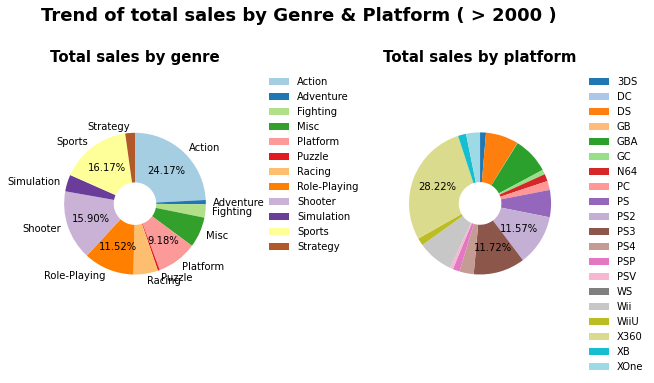

In [32]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(1, 2, figsize = (9, 5))
plt.subplots_adjust(wspace = 1.2) # interval between subplots
fig.suptitle('Trend of total sales by Genre & Platform ( > 2000 )', fontsize = 18, fontweight = 'heavy', position=(0.5, 1.0+0.05))
	
colors_gen = sns.color_palette('Paired',len(df_tot_gen.columns)) # bring seaborn palette
colors_plat = sns.color_palette('tab20',len(df_tot_plat.columns)) # bring seaborn palette
position = [(0, 0), (0, 1)]

axes[0].pie(df_tot_gen.iloc[0], # Region 별로 sales plot
         labels = df_tot_gen.columns,
         counterclock = False, # clockwise
         autopct = lambda p : '{:.2f}%'.format(p) if p > 8 else " ", # marking % (only for less than 15)
         pctdistance = 0.65, # position of % mark
         shadow = False, startangle = 90, # Start from 90 degree
         wedgeprops = {'width' : 0.7}, # donut shape; diameter differences (large - small)
         colors = colors_gen)
axes[0].axis('equal')
axes[0].set_title('Total sales by genre', fontsize = 15, fontweight = 'heavy')
axes[0].legend(labels = df_tot_gen.columns, bbox_to_anchor=(1.3, 1.0), fontsize = 10, frameon = False)

axes[1].pie(df_tot_plat.iloc[0], # Region 별로 sales plot
         labels = None,
         counterclock = False, # clockwise
         autopct = lambda p : '{:.2f}%'.format(p) if p > 10 else " ", # marking % (only for less than 15)
         pctdistance = 0.65, # position of % mark
         shadow = False, startangle = 90, # Start from 90 degree
         wedgeprops = {'width' : 0.7}, # donut shape; diameter differences (large - small)
         colors = colors_plat)
axes[1].axis('equal')
axes[1].set_title('Total sales by platform', fontsize = 15, fontweight = 'heavy')
axes[1].legend(labels = df_tot_plat.columns, bbox_to_anchor=(1.6, 1.0), fontsize = 10, frameon = False)

plt.savefig(fig_path + '/6_Trend of total sales by Genre & Platform.png', bbox_inches='tight')
plt.show();

## **7. (Year > 2000) 에서 지역별 선호되는 플랫폼**

In [33]:
condition = (df_plat_raw['Year'] >= 2000)
df_plat_region = df_plat_raw[condition].copy()
df_plat_region = df_plat_region.sort_values('Year', ascending = False)
df_plat_region.reset_index(drop = True, inplace = True)

df_plat_region_part = df_plat_region.drop(['Year', 'Genre'], axis = 1)

df_plat_region_part = df_plat_region_part.groupby('Platform').sum()
df_plat_region_part = df_plat_region_part.transpose()

df_plat_region_part.head()

Platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
NA_Sales,550072.21,2.53,5160376.24,9.12,4980178.85,580130.87,600021.21,840061.84,760064.87,5650557.34,3830383.54,2350090.69,560104.12,600015.26,0.00,5500489.10,1180037.14,22010565.57,1180177.24,1880081.31
EU_Sales,470053.72,0.79,1480189.13,5.19,830073.65,510037.69,120005.99,1000116.24,2090044.79,4760324.04,6810332.59,420119.87,340066.25,80016.02,0.00,1960258.59,670023.56,6700267.71,780057.38,1530044.10
JP_Sales,210092.32,3.96,1250167.46,70012.74,3150043.36,30020.80,1060007.19,0.08,3770016.33,830132.96,620077.50,50013.80,620074.23,60020.52,0.96,860064.88,12.79,80012.06,1.38,0.34
Other_Sales,220011.53,0.13,190059.14,1.68,30007.58,40005.06,1.04,380022.20,80007.86,1280185.46,1430138.93,700041.27,170040.87,50008.29,0.00,440077.97,6.45,1760081.83,40008.23,10011.91


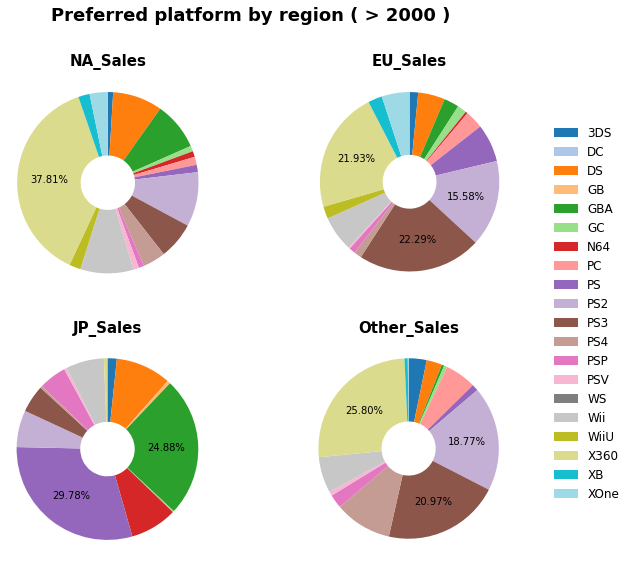

In [34]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(2, 2, figsize = (9, 9))
plt.subplots_adjust(wspace = 0.5, hspace = 0.2) # interval between subplots
fig.suptitle('Preferred platform by region ( > 2000 )', fontsize = 18, fontweight = 'heavy')
	
colors = sns.color_palette('tab20',len(df_plat_region_part.columns)) # bring seaborn palette
position = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i in range (4) :
  ax = axes[position[i]] # positon of subplot
  ax.pie(df_plat_region_part.iloc[i], # Region 별로 sales plot
         labels = None,
         counterclock = False, # clockwise
         autopct = lambda p : '{:.2f}%'.format(p) if p > 15 else " ", # marking % (only for less than 15)
         pctdistance = 0.65, # position of % mark
         shadow = False, startangle = 90, # Start from 90 degree
         wedgeprops = {'width' : 0.7}, # donut shape; diameter differences (large - small)
         colors = colors)
  ax.axis('equal')
  ax.set_title(df_plat_region_part.index[i], fontsize = 15, fontweight = 'heavy')

axes[0, 1].legend(labels = df_plat_region_part.columns, bbox_to_anchor=(1.6, 0.8), fontsize = 12, frameon = False)

plt.savefig(fig_path + '/7_Preferred platform by region.png', bbox_inches='tight')
plt.show();

## **8. (Year > 2000) && (선호되는 플랫폼 top 5) 에서 출시되는 장르**

In [38]:
df_plat_gen = df_plat_region.copy()
df_plat_gen.drop(['Year', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], axis = 1, inplace = True)

condition = df_plat_gen['Platform'].isin(['X360', 'PS3', 'PS2', 'PS', 'GBA'])
df_plat_gen = df_plat_gen[condition]
condition = df_plat_gen['Genre'].isin(['Action', 'Platform', 'Sports', 'Shooter', 'Racing', 'Role-Playing'])
df_plat_gen = df_plat_gen[condition]

df_plat_gen = pd.DataFrame(df_plat_gen.groupby(['Platform', 'Genre']).size())

df_plat_gen.reset_index(inplace = True)
df_plat_gen.columns = ['Platform', 'Genre', 'Count']

df_plat_gen = df_plat_gen.sort_values(by = 'Genre' , ascending = True)
df_plat_gen_wide = df_plat_gen.pivot_table(index = 'Platform', columns = 'Genre', values = 'Count').copy()
df_plat_gen_wide.head()

Genre,Action,Platform,Racing,Role-Playing,Shooter,Sports
Platform,,,,,,
GBA,161,138,63,72,40,88
PS,49,17,33,17,18,62
PS2,341,100,209,182,157,388
PS3,368,35,89,116,154,210
X360,318,24,100,75,195,215


In [45]:
df_plat_gen2 = df_plat_region.copy()

df_plat_gen2['Total_Sales'] = df_plat_gen2[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum(axis = 1)
df_plat_gen2.drop(['Year', 'NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], axis = 1, inplace = True)

condition = df_plat_gen2['Platform'].isin(['X360', 'PS3', 'PS2', 'PS', 'GBA'])
df_plat_gen2 = df_plat_gen2[condition]
condition = df_plat_gen2['Genre'].isin(['Action', 'Platform', 'Sports', 'Shooter', 'Racing', 'Role-Playing'])
df_plat_gen2 = df_plat_gen2[condition]

df_plat_gen2 = pd.DataFrame(df_plat_gen2.groupby(['Platform', 'Genre']).sum())

df_plat_gen2.reset_index(inplace = True)
df_plat_gen2.columns = ['Platform', 'Genre', 'Total_Sales']

df_plat_gen2 = df_plat_gen2.sort_values(by = 'Genre' , ascending = True)
df_plat_gen2_wide = df_plat_gen2.pivot_table(index = 'Platform', columns = 'Genre', values = 'Total_Sales').copy()

df_plat_gen2_wide.head()
#df_plat_gen2.head()

Genre,Action,Platform,Racing,Role-Playing,Shooter,Sports
Platform,,,,,,
GBA,1920052.13,3200074.76,50018.70,3780060.37,10003.55,16.32
PS,32.11,260008.00,1060010.21,2990013.79,9.11,80028.31
PS2,1330264.87,2690066.66,1330151.09,470085.19,420107.52,4320254.94
PS3,4400297.07,80029.66,750072.24,2040072.75,970194.68,2780132.24
X360,12020227.58,110011.26,50064.86,700062.43,10990264.65,3340133.99


In [46]:
df_plat_gen_div = df_plat_gen2_wide.div(df_plat_gen_wide)

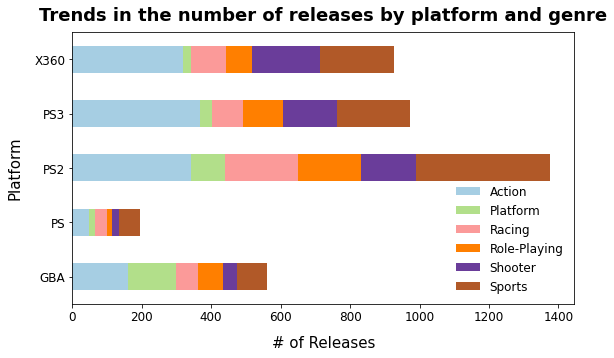

In [50]:
plt.rcParams['figure.figsize'] = (9, 5)
df_plat_gen_wide.plot(kind = 'barh', stacked = True, colormap = 'Paired');

plt.title('Trends in the number of releases by platform and genre', fontsize = 18, fontweight = 'heavy', position=(0.5, 1.0+0.02))
plt.ylabel('Platform', fontsize = 15, labelpad = 12)
plt.xlabel('# of Releases', fontsize = 15, labelpad = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.legend(loc='lower right', fontsize = 12, frameon = False)

plt.savefig(fig_path + '/8-2_Trends in the number of releases by platform and genre.png', bbox_inches='tight')
plt.show();

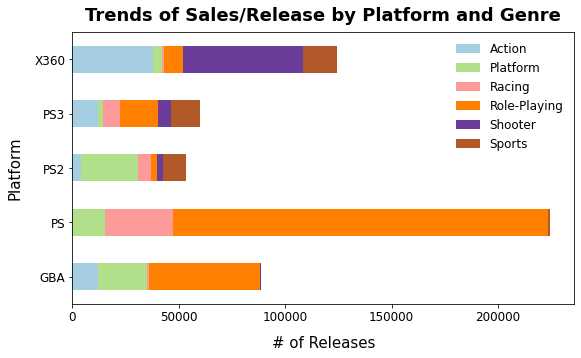

In [49]:
plt.rcParams['figure.figsize'] = (9, 5)
df_plat_gen_div.plot(kind = 'barh', stacked = True, colormap = 'Paired');

plt.title('Trends of Sales/Release by Platform and Genre', fontsize = 18, fontweight = 'heavy', position=(0.5, 1.0+0.02))
plt.ylabel('Platform', fontsize = 15, labelpad = 12)
plt.xlabel('# of Releases', fontsize = 15, labelpad = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.legend(loc='upper right', fontsize = 12, frameon = False)

plt.savefig(fig_path + '/8-1_Trends of Sales div Release by platform and genre.png', bbox_inches='tight')
plt.show();